In [1]:
# imports 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
from time import perf_counter
from numpy.linalg import eig
from skimage.feature import peak_local_max
from scipy.ndimage.filters import maximum_filter

C:\Users\Iustin\AppData\Local\Temp/ipykernel_20624/440101183.py:8: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter


# Exercise 1  


* Run the 5x5 eigenfilter in the ascending order on the bender image after applying a gaussian smoothing filter. 
(Use some code from the lab:)
* What is the effect of the gaussian filter?  
   -The effect of Gaussian filter is to blur an image and the degree of smoothing is determined by the standard deviation of the Gaussian. Useful for various purposes such as reducing noise or removing small details.


* Can you relate it to the PCA algorithm? 

   -Firstly, PCA extract the relevant information from complex data sets and provides a solution to reduce dimensionality, while preserving the most important information or features. In this way, the Gaussian filter can be used as a pre-processing step in PCA in order to smooth the data and remove noise. This can bring some improvements to the PCA results by reducing the impact of outliers in the data. Thus, we can use Gaussian in conjunction with PCA.


   -Further more, in my research for this task, I also find a Paper that use Gaussian based PCA that show more accurate results than a normal PCA for face recognition: "Application of Gaussian Filter with Principal Component Analysis Algorithm for The Efficient Face Recognition, Shashikant Sharma, Kota Solomon Raju" 

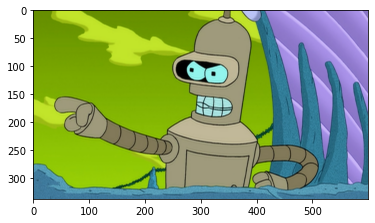

In [2]:
img_bender = cv.imread('bender.png')
# convert to grayscale
img_bender_gray = cv.cvtColor(img_bender, cv.COLOR_BGR2GRAY) 
# show the original image
plt.imshow(img_bender) 
plt.show()

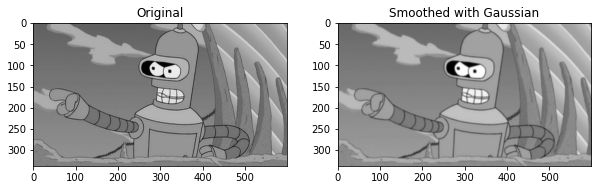

In [18]:
# apply a gaussian smoothing filter
img_bender_gray_gauss = cv.GaussianBlur(img_bender_gray, (5,5), 0) 
# show original image and smoothed image side by side
titles = ['Original', 'Smoothed with Gaussian']
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(img_bender_gray, cmap='gray')
ax[0].set_title(titles[0])
ax[1].imshow(img_bender_gray_gauss, cmap='gray')
ax[1].set_title(titles[1])
plt.show()



In [5]:
def top_eigenvalues(local_patch, direction="asc"):
  normalized_lp = (local_patch  - local_patch.min())/(local_patch.max() - local_patch.min())
  covar_matrix = np.cov(normalized_lp)
  eigen_vals, eigen_vect = eig(np.nan_to_num(covar_matrix))
  
  sorted_eigenvals = np.sort(np.abs(eigen_vals))

  if direction == "asc":
    return sorted_eigenvals[:3]
  else:
    return sorted_eigenvals[::-1][:3]


In [6]:
# filtering is done in the same fashion as in the conv2D, as the convolution is 
# at the heart of the Image Processing domain. 
def eigen_filter(input_image, patch_size, agg_function, direction='asc'):
  h, w = input_image.shape
  h_c, w_c = patch_size

  d_h = h_c // 2
  d_w = w_c // 2

  # apply zero-padding for the input image
  oper_image = np.zeros((h + 2 * d_h, w + 2 * d_w))
  oper_image[d_h:(h + d_h), d_w:(w + d_w)] = input_image
  output_img = np.zeros((h, w, 3))

  for i in range(h):
    for j in range(w):
      l_i = i + d_h
      l_j = j + d_w
      patch = oper_image[(l_i - d_h):(l_i + d_h + 1), (l_j - d_w):(l_j + d_w + 1)]
      output_img[i, j, :] = agg_function(patch, direction=direction)

  output_img = (output_img  - output_img.min())/(output_img.max() - output_img.min())
  return output_img

* Run the 5x5 eigenfilter on image in asc order

C:\Users\Iustin\AppData\Local\Temp/ipykernel_20624/679490429.py:2: RuntimeWarning: invalid value encountered in true_divide
  normalized_lp = (local_patch  - local_patch.min())/(local_patch.max() - local_patch.min())


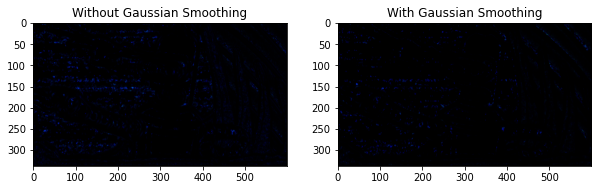

In [14]:
# apply the filter on image with gaussian smoothing and without gaussian smoothing
results1 = eigen_filter(img_bender_gray, (5, 5), top_eigenvalues, direction="asc")
results2 = eigen_filter(img_bender_gray_gauss, (5, 5), top_eigenvalues, direction="asc")
titles = ["Without Gaussian Smoothing", "With Gaussian Smoothing"]
# plot with titles 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(results1)
ax[0].set_title(titles[0])
ax[1].imshow(results2)
ax[1].set_title(titles[1])
plt.show()


# plt.imshow(eigen_filter(img_bender_gray_gauss, (5, 5), top_eigenvalues, direction="asc"))

* Run the 5x5 eigenfilter on image in desc order

C:\Users\Iustin\AppData\Local\Temp/ipykernel_20624/679490429.py:2: RuntimeWarning: invalid value encountered in true_divide
  normalized_lp = (local_patch  - local_patch.min())/(local_patch.max() - local_patch.min())


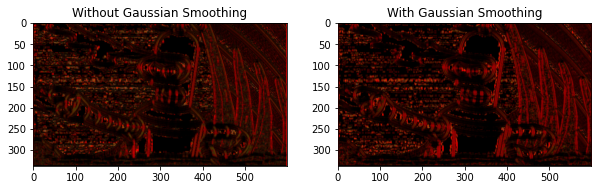

In [13]:
# apply the filter on image with gaussian smoothing and without gaussian smoothing
results1 = eigen_filter(img_bender_gray, (5, 5), top_eigenvalues, direction="desc")
results2 = eigen_filter(img_bender_gray_gauss, (5, 5), top_eigenvalues, direction="desc")
titles = ["Without Gaussian Smoothing", "With Gaussian Smoothing"]
# plot with titles 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(results1)
ax[0].set_title(titles[0])
ax[1].imshow(results2)
ax[1].set_title(titles[1])
plt.show()


* For both cases (asc and desc order) we can see that the Gaussian smoothing is a way to remove some of the outliers from the image and also reduces the amount of detail in the image such as the edges. In the asc order we obtain an image with small regions of noise and for desc order we also remove some of the outliers.

# Exercise 2

### Compare the results of the eigenfilter when using the ascending vs. descending order. What can you observe? Why? 

<b>(regarding the asc order)</b> We cand observe that sorting the eigenvalues in ascending or descending order can affect the results. Some theory from lab: determinant of the matrix is the product of the eigenvalues (up to some conditions). So, this filter is going to be activated in areas where the determinant of covariance matrix for the patch is not 0. If the 3-smallest values are low then the output of the filter is also going to be small (close to 0). In this way, for ascending order we can see the noise: covariance is related to variance and regions with high variance in small patches are usually noisy regions. In the results we can see that the image has some sources of noise.(it appears in more or less all the regions of the image).

<b>(regarding the desc order)</b> For descending order (take the largest eigenvalues),we select the most significant components of the image variance. Also some theory from the lab, related to PCA, states that the optimum direction that we can project a set of points such that the output variance is max correspond to eigenvector that characteristic to the largest eigenvalue. So, this components will define the orientation and magnitude of the eigenfilters. We can observe that is a good filter to detect edges (which are some other regions with very high variance). In this way we can reduce the dimensionality of the data while preserving the most important information.

### Increase the size of the patch used to compute the eigen decomposition. Explain your results.

C:\Users\Iustin\AppData\Local\Temp/ipykernel_20624/679490429.py:2: RuntimeWarning: invalid value encountered in true_divide
  normalized_lp = (local_patch  - local_patch.min())/(local_patch.max() - local_patch.min())


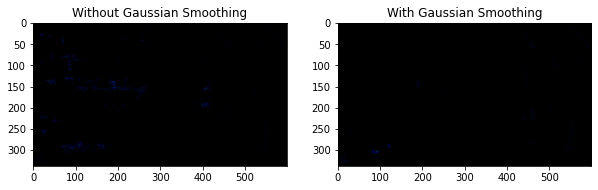

In [15]:
# apply the filter on image with gaussian smoothing and without gaussian smoothing
results1 = eigen_filter(img_bender_gray, (15, 15), top_eigenvalues, direction="asc")
results2 = eigen_filter(img_bender_gray_gauss, (15, 15), top_eigenvalues, direction="asc")
titles = ["Without Gaussian Smoothing", "With Gaussian Smoothing"]
# plot with titles 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(results1)
ax[0].set_title(titles[0])
ax[1].imshow(results2)
ax[1].set_title(titles[1])
plt.show()


C:\Users\Iustin\AppData\Local\Temp/ipykernel_20624/679490429.py:2: RuntimeWarning: invalid value encountered in true_divide
  normalized_lp = (local_patch  - local_patch.min())/(local_patch.max() - local_patch.min())


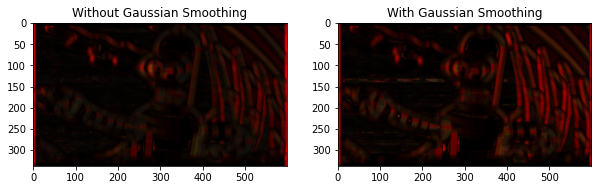

In [17]:
# apply the filter on image with gaussian smoothing and without gaussian smoothing
results1 = eigen_filter(img_bender_gray, (15, 15), top_eigenvalues, direction="desc")
results2 = eigen_filter(img_bender_gray_gauss, (15, 15), top_eigenvalues, direction="desc")
titles = ["Without Gaussian Smoothing", "With Gaussian Smoothing"]
# plot with titles 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(results1)
ax[0].set_title(titles[0])
ax[1].imshow(results2)
ax[1].set_title(titles[1])
plt.show()


* For the asc order (with and without Gaussian smooting) we observe that we have less regions of noise and for the desc order (with and without Gaussian smooting) we can observe that we have more bluring in the image (we have blurred edges and not so clear textures as the previous runs). Thus, increasing the path size will decrease the amount of detail and also the amount of details captured.

# Exercise 3

Given the matrix A of size nxn, is there a relationship between the eigenvalues of the matrix A and the eigenvalues of the covariance matrix used for eigen decomposition? What is the definition of the covariance matrix? What is the relationship between the eigenvectors of the matrix A and the eigenvectors of the covariance matrix?

 * What is the definition of the covariance matrix?


   -The covariance matrix is a mathematical concept in statistics that displays the variance exhibited by elements of datasets and the covariance between a pair of datasets. Variance is a measure of dispersion and can be defined as the spread of data from the mean of the given dataset. Covariance is calculated between two variables and is used to measure how the two variables vary together.
 

* Given the matrix A of size nxn, is there a relationship between the eigenvalues of the matrix A and the eigenvalues of the covariance matrix used for eigen decomposition?


  -Yes, there is a relationship between the eigenvalues of the matrix A and the eigenvalues of the covariance matrix used for eigen decomposition. If we compute the covariance matrix, and a detail here is that matrix A has to be 0-center, so just substracting the mean we have: Covariance_Matrix = (1/n) * (A-mean)*(A-mean)^T. Then we can get the eigenvalues and eigenvector and the eigenvector are going to be the principal components and the eigenvalues are going to tell us how important each principal component is. Thus, based of the formula above, the eigenvalues of the covariance matrix C are proportional to the eigenvalues of the original matrix A, with a scaling factor of 1/n. Further more, we can compute the eigenvectors of the covariance matrix C and scale them by a factor of 1/sqrt(miu_i) to obtain the eigenvectors of the original matrix. (relationship between the eigenvectors of the matrix A and the eigenvectors of the covariance matrix), unde miu_i = lambda_i / n.

* What is the relationship between the eigenvectors of the matrix A and the eigenvectors of the covariance matrix?


  -Eigenvectors of a covariance matrix represents the direction in which the data varies the most. These principal directions are the same as the eigenvectors of the matrix A and this relationship is used in principal component analysis(PCA). Based on the formula above and also by the fact that we can express the covariance matrix as Covariance_Matrix = P * D * P ^ T (from lab), where D is the diagonal matrix with the eigenvalues of A and P is the eigenvectors of A.  Therefore, the eigenvectors of C are the columns of P, which are the same as the eigenvectors of A.

# Exercise 4

* Using the information here, compare the Harris corner detector with the Kanade Tomasi operator and the Nobel operator. Start form the provided code to implement all the variants.

The current implementation in lab is using : Harris & Stephens 

In [57]:
def extract_harris_response(in_img, sigma, k, thresh, min_distance, operator='Harris'):
  h, w = in_img.shape
  width = int(np.ceil(3 * sigma)) # 97% of the values are in [m-3s, m+3s]
  # compute a gaussian kernel based on the sigma value
  xx = np.vstack([np.arange(-width, width + 1, dtype=np.float32) for _ in range(2 * width + 1)])
  yy = xx.T
  gaussian_kern = 1/(2 * sigma**2) * (-(np.square(xx) + np.square(yy)))
  gaussian_kern = np.exp(gaussian_kern)
  
  # compute image gradients
  horizontal_filter = 1/2 * np.array([[0, 0, 0],
                                      [-1, 0, 1],
                                      [0, 0, 0]])
  vertical_filter = 1/2 * np.array([[0, -1, 0],
                                    [0, 0, 0],
                                    [0, 1, 0]])
  in_img_x = cv.filter2D(in_img, -1, horizontal_filter)
  in_img_y = cv.filter2D(in_img, -1, vertical_filter)

  # compute the square and the elementwise multiplication of the gradients 
  # simulate the gaussian neighborhood in the definition through a convolution of the 
  # gradients values with the gaussian filter
  img_x_sq = cv.filter2D(np.square(in_img_x), -1, gaussian_kern)
  img_y_sq = cv.filter2D(np.square(in_img_y), -1, gaussian_kern)
  img_xy = cv.filter2D(in_img_x * in_img_y, -1, gaussian_kern)

  # allocate memory for the filter output
  C = np.zeros((h, w))
  # keep indices for the corners
  corners = np.zeros((2, h * w))

  # compute the filter response for each of the image pixels
  for i in range(h):
    for j in range(w):
      H = np.array([[img_x_sq[i, j], img_xy[i, j]], 
                    [img_xy[i, j], img_y_sq[i, j]]])
      if operator == 'Harris':
            filter_response = np.linalg.det(H) - k * (np.trace(H) ** 2)
            C[i, j] = filter_response
      elif operator == 'Nobel':
            filter_response = np.linalg.det(H) / (np.trace(H) + 1e-6)
            C[i, j] = filter_response
      else: # Kanade & Tomasi
            eigen_values = np.linalg.eigvals(H)
            # take min between eigen values1 and eigen values2
            filter_response = min(eigen_values)
            C[i, j] = filter_response
         

  # perform non_max suppression (suppress all the values that are non-maximum in
  # a local neighborhood)
  coordinates = peak_local_max(C, min_distance=min_distance)

 
  corner_idx = 0
  for i, j in coordinates:
    if C[i, j] > thresh * C.max():
        corners[:, corner_idx] = np.array([i, j])
        corner_idx += 1
  
  return C, corners[:, :corner_idx]


### Plot the results: Using Harris & Stephens (from lab)

In [44]:
img_house = cv.imread('image001.jpg') 
in_img = cv.cvtColor(img_house, cv.COLOR_BGR2GRAY).astype(np.float32) 
C, corners_idx = extract_harris_response(in_img, 1, 4e-2, 1e-4, min_distance=45, operator='Harris')  


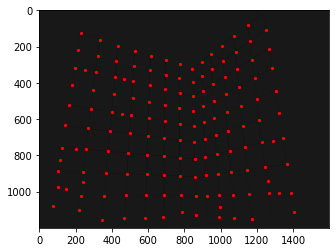

In [45]:
plt.imshow(C, cmap='gray')
for position in corners_idx.T:
    plt.scatter(position[1], position[0], s=5, c='red', marker='o')


### Using Nobel

In [58]:
img_house = cv.imread('image001.jpg') 
in_img = cv.cvtColor(img_house, cv.COLOR_BGR2GRAY).astype(np.float32) 
C, corners_idx = extract_harris_response(in_img, 1, 4e-2, 1e-4, min_distance=45, operator='Nobel')


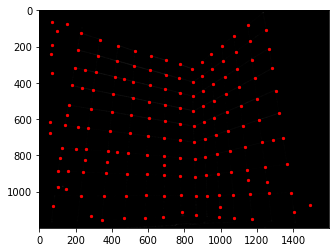

In [59]:
plt.imshow(C, cmap='gray')
for position in corners_idx.T:
    plt.scatter(position[1], position[0], s=5, c='red', marker='o')


### Using Kanade & Tomasi

In [60]:
img_house = cv.imread('image001.jpg') 
in_img = cv.cvtColor(img_house, cv.COLOR_BGR2GRAY).astype(np.float32) 
C, corners_idx = extract_harris_response(in_img, 1, 4e-2, 1e-4, min_distance=45, operator='Kanade')


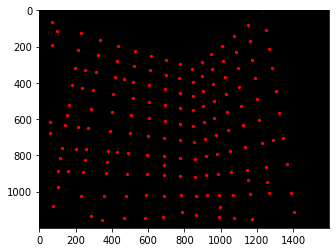

In [61]:
plt.imshow(C, cmap='gray')
for position in corners_idx.T:
    plt.scatter(position[1], position[0], s=5, c='red', marker='o')


As we can see from the images above, the first method, the one from the lab, obtain the best results. For the Kanade-Tomasi we use the minimum eigenvalue of the structure and for the Nobel operator we use the curvature of the intensity surface. In both cases we obtain good results, with some outliers but the image is not perfect also and can contain some outliers too. On this image both algorithms perform well, the main differences between results are at the edges of the pattern provided: some points are introduced in the image. In practice I think that each algorithm has its own advantages and disadvantages and may perform better in certain situations depending on the characteristics of the image being analyzed.